In [1]:
import pandas as pd
train = pd.read_csv("LR_dataset/train.csv")

In [2]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
train = train[train['y'].notnull()]

In [4]:
train.shape

(699, 2)

In [5]:
x_train = train['x'].values
y_train = train['y'].values

In [6]:
x_train = (x_train-x_train.mean())/x_train.std()

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
import numpy as np

In [9]:
def hypothesis(x,theta):
    return x*theta[1]+theta[0]

def gradiend(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
     
    return grad/m

In [58]:
def error(X,Y,theta):
    
    m = X.shape[0]
    e = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        e+= (y_-y)**2
    return e/m

def gradient_decent(X,Y,epochs = 100,lr=0.1):
    theta = np.zeros((2,))
    theta_list = []
    error_list = []
    for i in range(epochs):
        grad = gradiend(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0]- lr*grad[0]
        theta[1] = theta[1]- lr*grad[1]
        theta_list.append([theta[0],theta[1]])
        
    return theta,error_list,theta_list

In [59]:
theta,error_list,theta_list = gradient_decent(x_train,y_train)

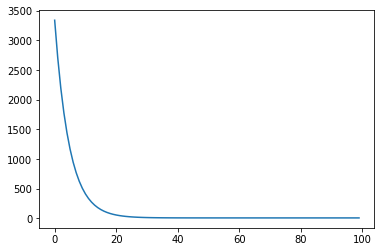

In [13]:
plt.plot(error_list)
plt.show()

In [60]:
theta_list

[[4.993986917045777, 2.895283303379383],
 [9.488575142386978, 5.501038276420828],
 [13.533704545194059, 7.846217752158128],
 [17.174321007720437, 9.956879280321699],
 [20.450875823994174, 11.856474655668912],
 [23.399775158640534, 13.566110493481405],
 [26.053784559822258, 15.104782747512647],
 [28.44239302088581, 16.489587776140766],
 [30.59214063584301, 17.735912301906076],
 [32.52691348930449, 18.85760437509485],
 [34.268209057419824, 19.86712724096475],
 [35.83537506872362, 20.775697820247657],
 [37.24582447889704, 21.593411341602277],
 [38.51522894805312, 22.329353510821434],
 [39.65769297029359, 22.991701463118673],
 [40.68591059031001, 23.58781462018619],
 [41.61130644832479, 24.124316461546957],
 [42.44416272053809, 24.607168118771646],
 [43.19373336553006, 25.041734610273867],
 [43.86834694602283, 25.432844452625865],
 [44.47549916846633, 25.784843310742662],
 [45.021936168665476, 26.10164228304778],
 [45.51372946884471, 26.386761358122385],
 [45.95634343900602, 26.64336852568

In [14]:
theta

array([49.9385427 , 28.95206401])

In [15]:
Y_ = hypothesis(x_train,theta)

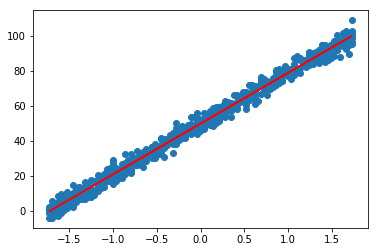

In [16]:
plt.scatter(x_train,y_train)
plt.plot(x_train,Y_,color = 'red')
plt.show()

In [17]:
test = pd.read_csv("LR_dataset/test.csv")

In [18]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [19]:
test.isnull().sum()

x    0
y    0
dtype: int64

In [20]:
x_test = test['x'].values
y_test = test['y'].values

In [21]:
x_test = (x_test-x_test.mean())/x_test.std()

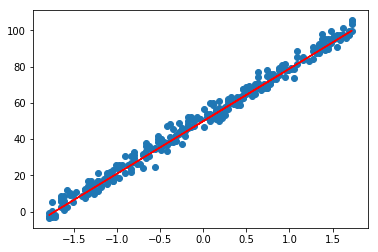

In [22]:
Y_ = hypothesis(x_test,theta)
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_,color = 'red')
plt.show()

In [24]:
theta

array([49.9385427 , 28.95206401])

In [49]:
T0 = np.arange(0,80,1)
T1 = np.arange(-10,70,1)

In [51]:
T0.shape

(80,)

In [52]:
T0,T1 = np.meshgrid(T0,T1)


In [53]:
T0.shape

(80, 80)

In [54]:
T0

array([[ 0,  1,  2, ..., 77, 78, 79],
       [ 0,  1,  2, ..., 77, 78, 79],
       [ 0,  1,  2, ..., 77, 78, 79],
       ...,
       [ 0,  1,  2, ..., 77, 78, 79],
       [ 0,  1,  2, ..., 77, 78, 79],
       [ 0,  1,  2, ..., 77, 78, 79]])

In [55]:
T1

array([[-10, -10, -10, ..., -10, -10, -10],
       [ -9,  -9,  -9, ...,  -9,  -9,  -9],
       [ -8,  -8,  -8, ...,  -8,  -8,  -8],
       ...,
       [ 67,  67,  67, ...,  67,  67,  67],
       [ 68,  68,  68, ...,  68,  68,  68],
       [ 69,  69,  69, ...,  69,  69,  69]])

In [56]:
J = np.zeros(T0.shape)
m = x_train.shape[0]
for i in range(J.shape[0]):
    for j in range(J.shape[0]):
        y_ = T0[i,j]+T1[i,j]*x_train
        J[i,j] = np.sum((y_-y_train)**2)/m

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

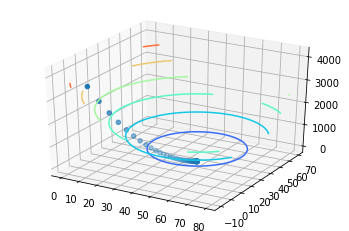

In [62]:
theta_list = np.array(theta_list)
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

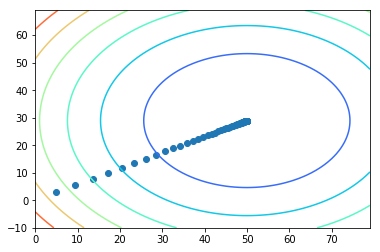

In [64]:
plt.contour(T0,T1,J,cmap = 'rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show